In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r"C:\Users\user\Desktop\adult.csv"


In [3]:
df=pd.read_csv(path)


In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
df["workclass"]=df["workclass"].replace("?", df["workclass"].mode()[0])

df["occupation"]=df["occupation"].replace("?", df["occupation"].mode()[0])

df["native-country"]=df["native-country"].replace("?", df["native-country"].mode()[0])

In [8]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df=df.drop(columns=["fnlwgt","educational-num","capital-gain",'capital-loss'])

In [10]:
df["income"] = df.income.map({'<=50K': "<=50k", '>50K': ">=50k", '<=50K.': "<=50k", '>50K.': ">=50k"})

In [11]:
df["marriage-status"]=df["marital-status"].map({'Never-married':'Single', "Widowed" : "Single", "Divorced":"Single", "Separated":"Single",'Married-civ-spouse':"Married",'Married-spouse-absent':"Married", 'Married-AF-spouse':"Married"  })


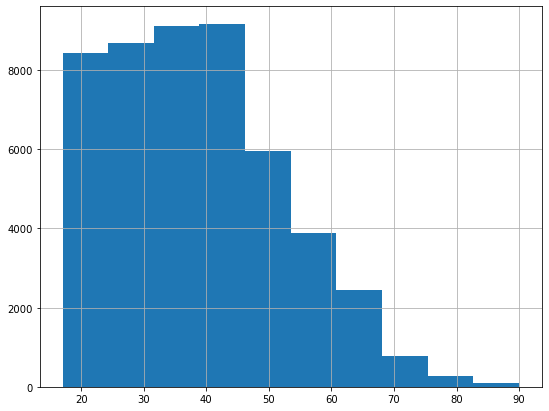

In [51]:
df['age'].hist(figsize=(9,7))
plt.show()

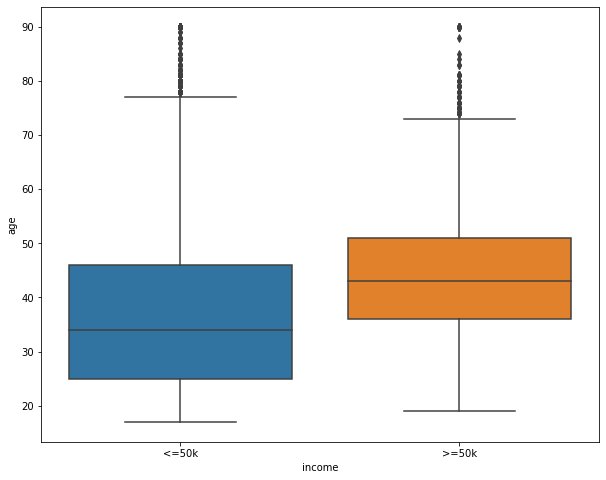

In [13]:
fig = plt.figure(figsize=(10,8)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

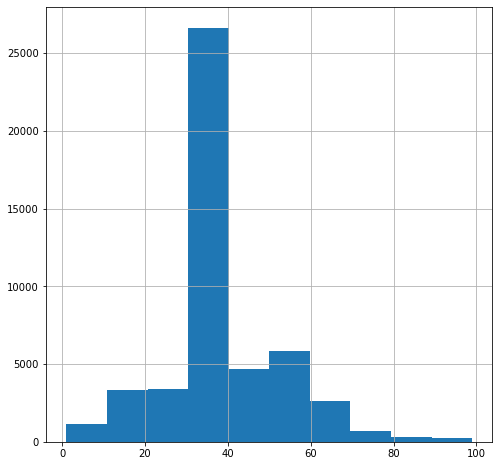

In [52]:
df['hours-per-week'].hist(figsize=(8,8))
plt.show()

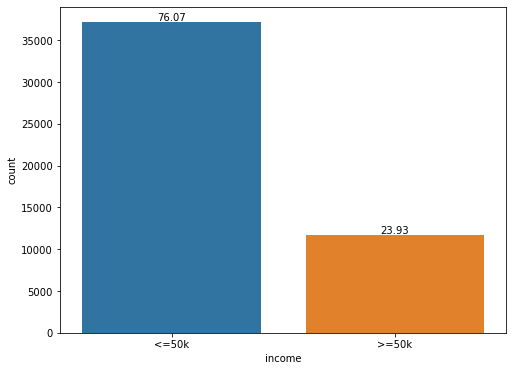

In [20]:
plt.figure(figsize=(8,6))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 200,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


# 76% of data earns under 50k

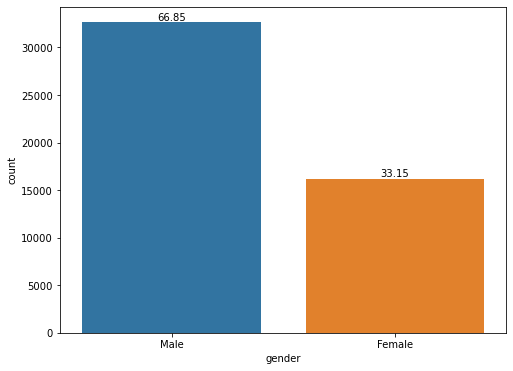

In [19]:
plt.figure(figsize=(8,6))
total = float(len(df) )

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 200,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

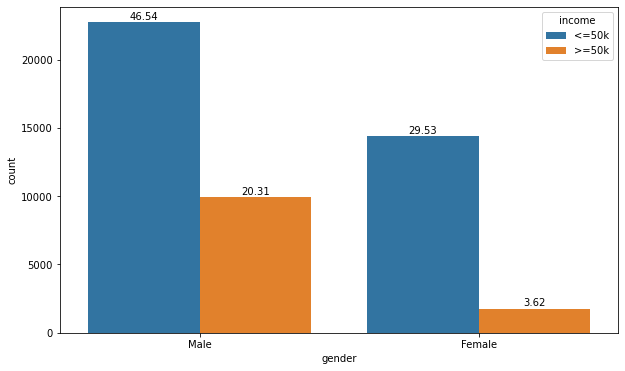

In [16]:
#%%
plt.figure(figsize=(10,6))
total = float(len(df) )

ax = sns.countplot(x="gender", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 200,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# %33 of the data are female.
# Only 3% of Female earn more than 50k  

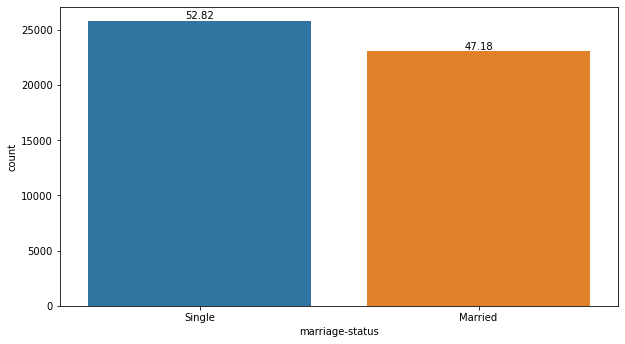

In [18]:
#%%
plt.figure(figsize=(10,5.5))
total = float(len(df) )

ax = sns.countplot(x="marriage-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 200,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

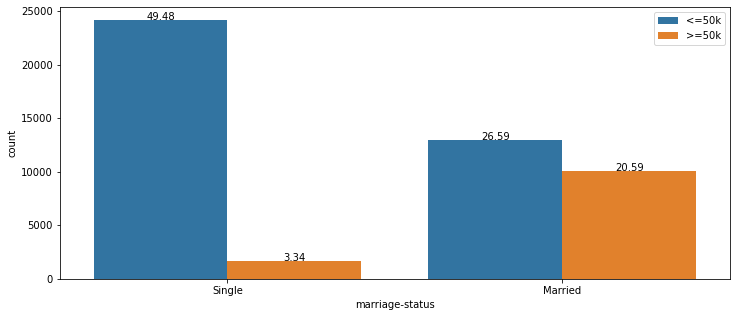

In [22]:
plt.figure(figsize=(12,5))
total = float(len(df["income"]) )

ax = sns.countplot(x="marriage-status", hue="income", data=df,)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.legend(loc='upper right')
plt.show()

# Intresting detection : Only %3.34 of the Single Adult earn more than 50k 
# But on the marriage side ; It is too close each other 

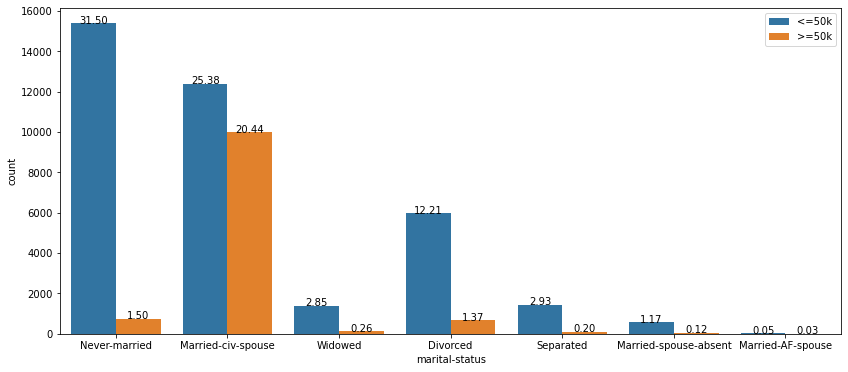

In [23]:

plt.figure(figsize=(14,6))
total = float(len(df["income"]) )

ax = sns.countplot(x="marital-status", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.legend(loc='upper right')
plt.show()

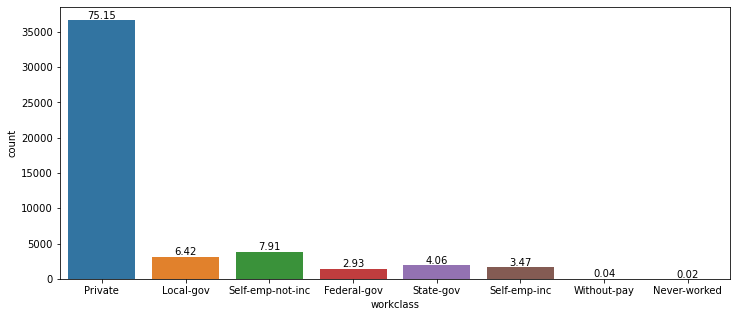

In [24]:
plt.figure(figsize=(12,5))
total = float(len(df) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 200,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# 75% of the Data work at Private sector. 


posx and posy should be finite values
posx and posy should be finite values


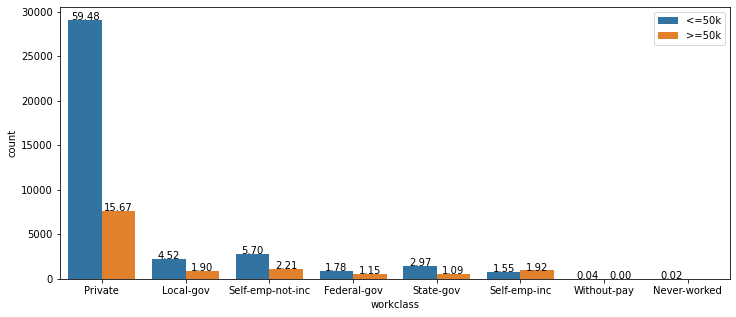

In [25]:
plt.figure(figsize=(12,5))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.legend(loc='upper right')
plt.show()


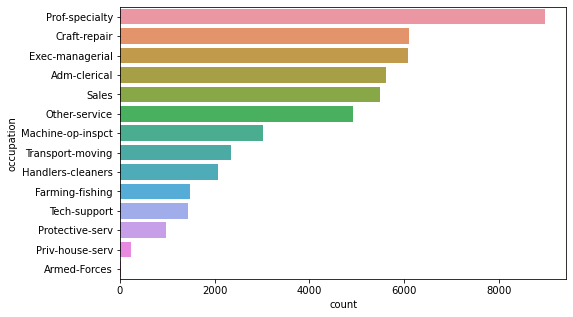

In [31]:
plt.figure(figsize=(8,5))
total = float(len(df) )

ax = sns.countplot(y="occupation", data=df, order = df["occupation"].value_counts().index)

    
plt.show()

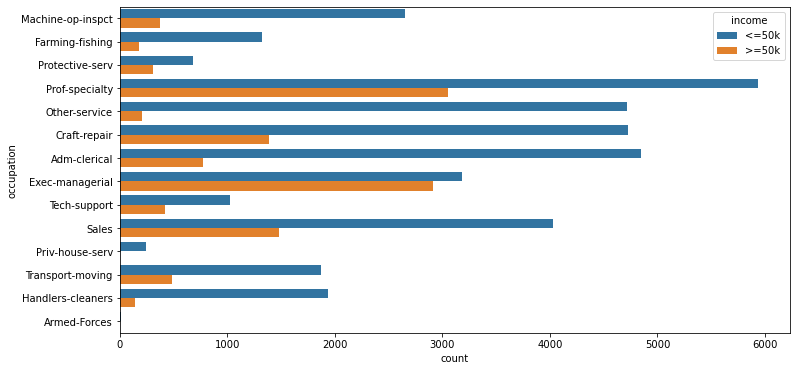

In [33]:
plt.figure(figsize=(12,6))
total = float(len(df) )

ax = sns.countplot(y="occupation", hue="income" , data=df)


plt.show()

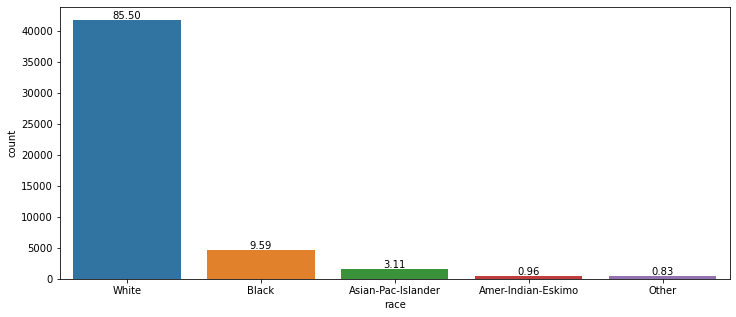

In [34]:
plt.figure(figsize=(12,5))
total = float(len(df) )

ax = sns.countplot(x="race", data=df, order = df["race"].value_counts().index )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 200,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    
    
plt.show()

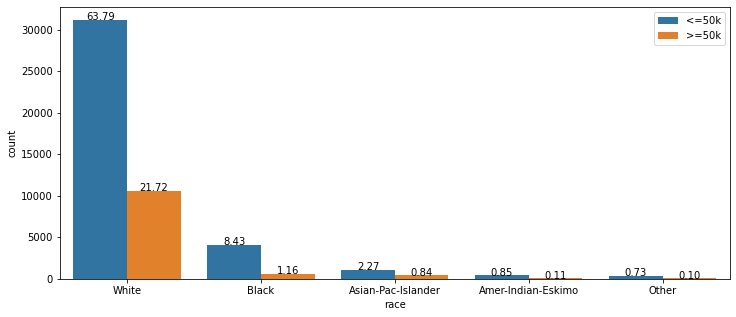

In [37]:
plt.figure(figsize=(12,5))
total = float(len(df["income"]) )

ax = sns.countplot(x="race", hue="income", data=df, order = df["race"].value_counts().index )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.legend(loc='upper right')
plt.show()

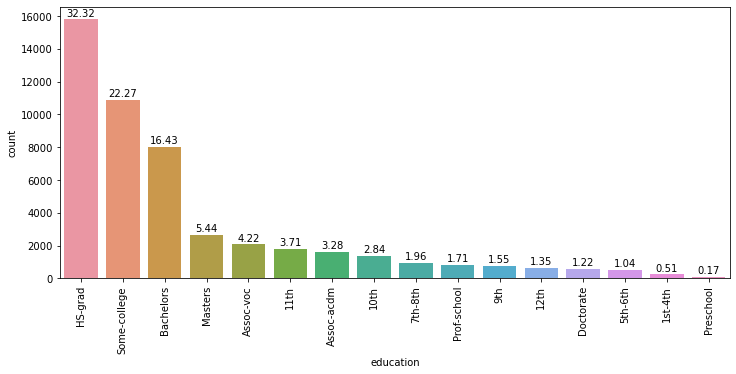

In [38]:
plt.figure(figsize=(12,5))
total = float(len(df) )

ax = sns.countplot(x="education", data=df, order =  df["education"].value_counts().index )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 200,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    
plt.xticks(rotation=90) 
plt.show()


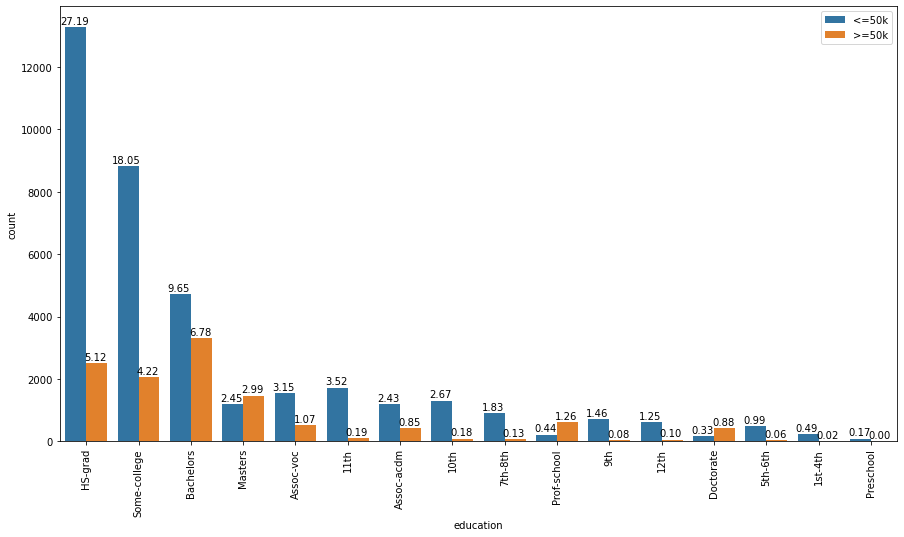

In [48]:
plt.figure(figsize=(15,8))
total = float(len(df["income"]) )

ax = sns.countplot(x="education", hue="income", data=df,  order = df["education"].value_counts().index )
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.3,
            height + 100,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    
plt.xticks(rotation=90) 
plt.legend(loc='upper right')
plt.show()